<h1><center>Final Project</center></h1>
<h3><center>Zining Wang, Wenxuan Wang, Wenda Zheng</center></h3>   

First, we read and preprocess the data:

In [226]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
testID = test.Id
train.head()


print train.shape


# from collections import Counter
# Counter(train.MiscFeature)

# Adjust House Price based on CPI index, Convert to 2010 December dollars (CPI indices are from Bureau of Labor Statistics)
train.ix[(train.YrSold == 2010) & 
         ((train.MoSold == 7)|(train.MoSold == 6)|(train.MoSold <= 4)),
         'SalePrice'] = train.SalePrice * 1.01
train.ix[(train.YrSold == 2009) & 
         ((train.MoSold == 1)|(train.MoSold == 6)|(train.MoSold <= 4)),
         'SalePrice'] = train.SalePrice * 1.04
train.ix[(train.YrSold == 2009) & 
         ((train.MoSold == 2)|(train.MoSold == 3)|(train.MoSold == 4)),
         'SalePrice'] = train.SalePrice * 1.03
train.ix[(train.YrSold == 2009) & 
         ((train.MoSold == 5)|(train.MoSold == 6)|(train.MoSold == 7)|(train.MoSold == 8)),
         'SalePrice'] = train.SalePrice * 1.02
train.ix[(train.YrSold == 2009) & 
         ((train.MoSold >= 9)),
         'SalePrice'] = train.SalePrice * 1.01
train.ix[(train.YrSold == 2008) & 
         ((train.MoSold == 1)|(train.MoSold == 12)),
         'SalePrice'] = train.SalePrice * 1.04
train.ix[(train.YrSold == 2008) & 
         ((train.MoSold == 3)|(train.MoSold == 11)),
         'SalePrice'] = train.SalePrice * 1.03
train.ix[(train.YrSold == 2008) & 
         ((train.MoSold == 5)|(train.MoSold == 10)),
         'SalePrice'] = train.SalePrice * 1.01
train.ix[(train.YrSold == 2007) & 
         ((train.MoSold == 1)|(train.MoSold == 2)),
         'SalePrice'] = train.SalePrice * 1.08
train.ix[(train.YrSold == 2007) & 
         ((train.MoSold == 3)),
         'SalePrice'] = train.SalePrice * 1.07
train.ix[(train.YrSold == 2007) & 
         ((train.MoSold == 4)),
         'SalePrice'] = train.SalePrice * 1.06
train.ix[(train.YrSold == 2007) & 
         ((train.MoSold == 5)|(train.MoSold == 6)|(train.MoSold == 7)|(train.MoSold == 8)|(train.MoSold == 9)|(train.MoSold == 10)),
         'SalePrice'] = train.SalePrice * 1.05
train.ix[(train.YrSold == 2007) & 
         ((train.MoSold == 11)|(train.MoSold == 12)),
         'SalePrice'] = train.SalePrice * 1.04
train.ix[(train.YrSold == 2006) & 
         ((train.MoSold == 1)),
         'SalePrice'] = train.SalePrice * 1.11
train.ix[(train.YrSold == 2006) & 
         ((train.MoSold == 2)|(train.MoSold == 3)),
         'SalePrice'] = train.SalePrice * 1.10
train.ix[(train.YrSold == 2006) & 
         ((train.MoSold == 4)|(train.MoSold >= 10)),
         'SalePrice'] = train.SalePrice * 1.09
train.ix[(train.YrSold == 2006) & 
         ((train.MoSold == 5)|(train.MoSold == 6)|(train.MoSold == 7)|(train.MoSold == 9)),
         'SalePrice'] = train.SalePrice * 1.08
train.ix[(train.YrSold == 2006) & 
         ((train.MoSold == 8)),
         'SalePrice'] = train.SalePrice * 1.07


# Converting features and filling missing values...
train['MSSubClass'] = train['MSSubClass'].astype(str)
test['MSSubClass'] = test['MSSubClass'].astype(str)
test['MSZoning'] = test['MSZoning'].fillna(train['MSZoning'].mode()[0])
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())
test['LotFrontage'] = test['LotFrontage'].fillna(train['LotFrontage'].mean())
train['Alley'] = train['Alley'].fillna('NoAlleyAccess')
test['Alley'] = test['Alley'].fillna('NoAlleyAccess')
train['MasVnrType'] = train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
test['MasVnrType'] = test['MasVnrType'].fillna(train['MasVnrType'].mode()[0])


# Impute test data with the most common category
for col in ('BsmtFullBath','BsmtHalfBath','Exterior1st','Exterior2nd','Functional'):
    test[col] = test[col].fillna(train[col].mode()[0])
# Impute test data with mean
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(train['BsmtUnfSF'].mean())
    
train['Fence'] = train['Fence'].fillna('NoFence')    
test['Fence'] = test['Fence'].fillna('NoFence')




for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train[col] = train[col].fillna('NoBasement')
    test[col] = test[col].fillna('NoBasement')
for col in ('BsmtFinSF1','BsmtFinSF2'):
    test[col] = test[col].fillna(0.0)
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(0)
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
test['KitchenQual'] = test['KitchenQual'].fillna(train['KitchenQual'].mode()[0])
train['FireplaceQu'] = train['FireplaceQu'].fillna('NoFirePlace')
test['FireplaceQu'] = test['FireplaceQu'].fillna('NoFirePlace')
train['PoolQC'] = train['PoolQC'].fillna('NoPool')
test['PoolQC'] = test['PoolQC'].fillna('NoPool')
train['MiscFeature'] = train['MiscFeature'].fillna('NoMisc')
test['MiscFeature'] = test['PoolQC'].fillna('NoMisc')


for col in ('GarageType', 'GarageFinish', 'GarageQual','GarageCond','GarageYrBlt'):
    train[col] = train[col].fillna('NoGarage')
    test[col] = test[col].fillna('NoGarage')
test['GarageCars'] = test['GarageCars'].fillna(0.0)
test['GarageArea'] = test['GarageArea'].fillna(0.0)

train['MasVnrArea'] = train['MasVnrArea'].fillna(0.0)
test['MasVnrArea'] = test['MasVnrArea'].fillna(0.0)




train['YrSold'] = train['YrSold'].astype(str)
test['MoSold'] = test['MoSold'].astype(str)


test['SaleType'] = test['SaleType'].fillna(train['SaleType'].mode()[0])




train = train.drop('Id',1)
test = test.drop('Id',1)
train = train.drop('Utilities',1)
test = test.drop('Utilities',1)

#print train.SalePrice

trainX = train.drop('SalePrice',1)
trainY = train.SalePrice
testX = test

train.head()

(1460, 81)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NoAlleyAccess,Reg,Lvl,Inside,Gtl,...,0,NoPool,NoFence,NoMisc,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NoAlleyAccess,Reg,Lvl,FR2,Gtl,...,0,NoPool,NoFence,NoMisc,0,5,2007,WD,Normal,190575.0
2,60,RL,68.0,11250,Pave,NoAlleyAccess,IR1,Lvl,Inside,Gtl,...,0,NoPool,NoFence,NoMisc,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NoAlleyAccess,IR1,Lvl,Corner,Gtl,...,0,NoPool,NoFence,NoMisc,0,2,2006,WD,Abnorml,154000.0
4,60,RL,84.0,14260,Pave,NoAlleyAccess,IR1,Lvl,FR2,Gtl,...,0,NoPool,NoFence,NoMisc,0,12,2008,WD,Normal,260000.0


Dummy code all categorical variables(46 out of 79 variables are categorical)

In [227]:
#print train.LotArea.dtype
count = 0
train_len = len(train)
alldata = pd.concat(objs=[trainX, testX], axis=0)
for col in alldata.columns:
    if alldata[col].dtype != 'int64' and alldata[col].dtype != 'float64':
        #count += 1
        #print 'The attribute', col, 'is',alldata[col].dtype, ' not numerical types. So we will drop it..'
        
        # concatenate the dummy variables and drop the duplicates
        alldata = pd.concat([alldata,pd.get_dummies(alldata[col]).iloc[:, 1:]], axis=1)
        alldata = alldata.drop(col,1)
# train_preprocessed = dataset_preprocessed[:train_objs_num]
# test_preprocessed = dataset_preprocessed[train_objs_num:]
#print count
trainX = alldata[:train_len]
testX = alldata[train_len:]

print alldata.columns
alldata.head()

Index([ u'LotFrontage',      u'LotArea',  u'OverallQual',  u'OverallCond',
          u'YearBuilt', u'YearRemodAdd',   u'MasVnrArea',   u'BsmtFinSF1',
         u'BsmtFinSF2',    u'BsmtUnfSF',
       ...
              u'ConLI',        u'ConLw',          u'New',          u'Oth',
                 u'WD',      u'AdjLand',       u'Alloca',       u'Family',
             u'Normal',      u'Partial'],
      dtype='object', length=407)


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,0,1,0,0,0,1,0


Do some basic plots to see correlations

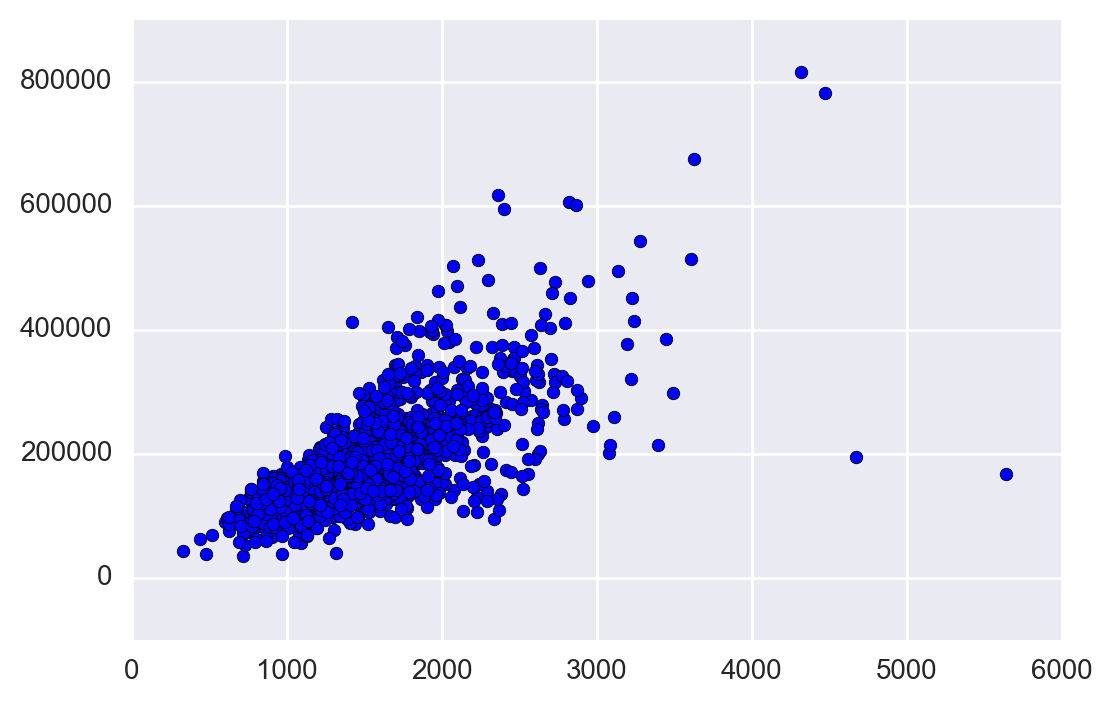

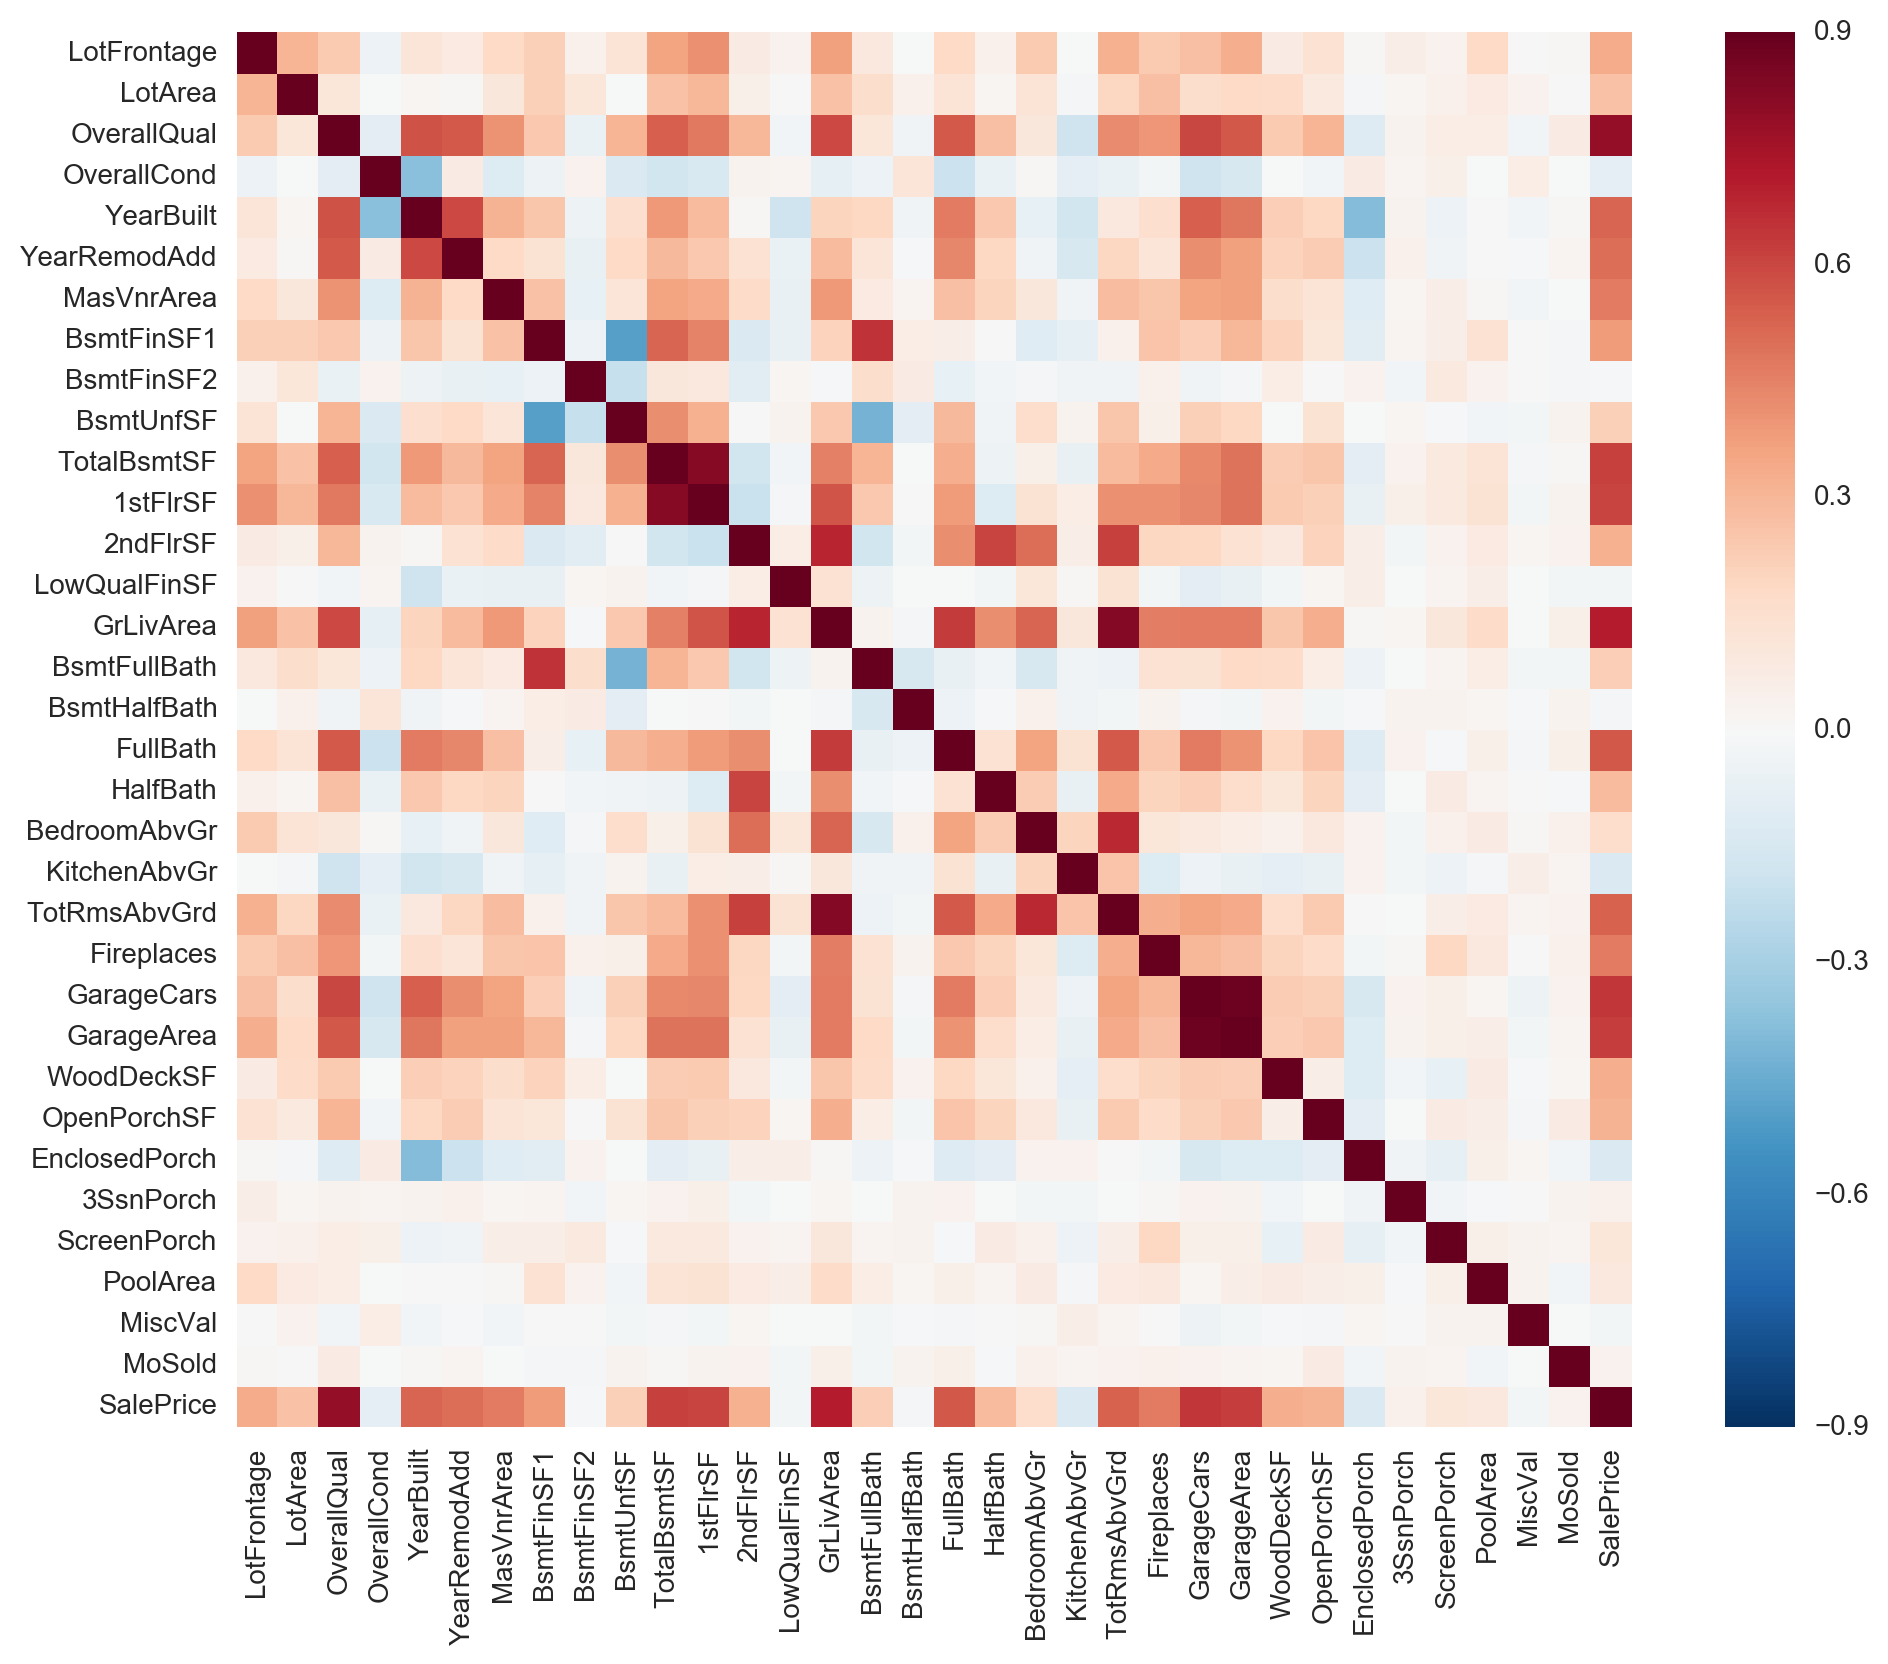

In [228]:
# # Check numbers of NA..
# NAs = pd.concat([train.isnull().sum(), test.isnull().sum()], axis=1, keys=['Train', 'Test'])
# print NAs[NAs.sum(axis=1) > 0]

# # drop columns with over 500 missing values...
# for mis in NAs[NAs.sum(axis=1) > 500].index:
#     train = train.drop(mis,1)

    


# Check numbers of NA..
# NAs = pd.concat([train.isnull().sum(), test.isnull().sum()], axis=1, keys=['Train', 'Test'])
# print NAs[NAs.Train > 0]
    
# Plot the correlation of Ground Living Area
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
# Make a correlation map to determine which features are not very correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [150]:
corrmat

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
LotFrontage,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.178699,0.215828,0.043340,0.122156,...,0.323663,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.334421
LotArea,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,...,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,0.265382
OverallQual,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,...,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,0.787774
OverallCond,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,...,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,-0.084604
YearBuilt,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,...,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,0.522890
YearRemodAdd,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,...,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.501783
MasVnrArea,0.178699,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,...,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,0.470966
BsmtFinSF1,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,...,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.383484
BsmtFinSF2,0.043340,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,...,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,-0.012024
BsmtUnfSF,0.122156,-0.002618,0.308159,-0.136841,0.149040,0.181133,0.113862,-0.495251,-0.209294,1.000000,...,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,0.216985


In [229]:
# See top 15 most important numerical features
#Contributed by Wenxuan
corrmat_val = corrmat.ix['SalePrice']
corrmat_val.sort_values(inplace = True, ascending = False)
most_correlated = corrmat_val[0:16]
most_correlated
core_attributes = []
for x in most_correlated.index:
    core_attributes.append(x)
train_core = train[[x for x in core_attributes]]
train_core.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF
0,208500.0,7,1710,2,548,856,856,2,8,2003,2003,196.0,0,706,65.0,0
1,190575.0,6,1262,2,460,1262,1262,2,6,1976,1976,0.0,1,978,80.0,298
2,223500.0,7,1786,2,608,920,920,2,6,2001,2002,162.0,1,486,68.0,0
3,154000.0,7,1717,3,642,756,961,1,7,1915,1970,0.0,1,216,60.0,0
4,260000.0,8,2198,3,836,1145,1145,2,9,2000,2000,350.0,1,655,84.0,192


Run Regularized Linear Regression on the selected attributes. We evaluate scoring metrics using mean squared error.

usual rule: alpha = 159.985872 
one stand error rule: alpha = 232.995181


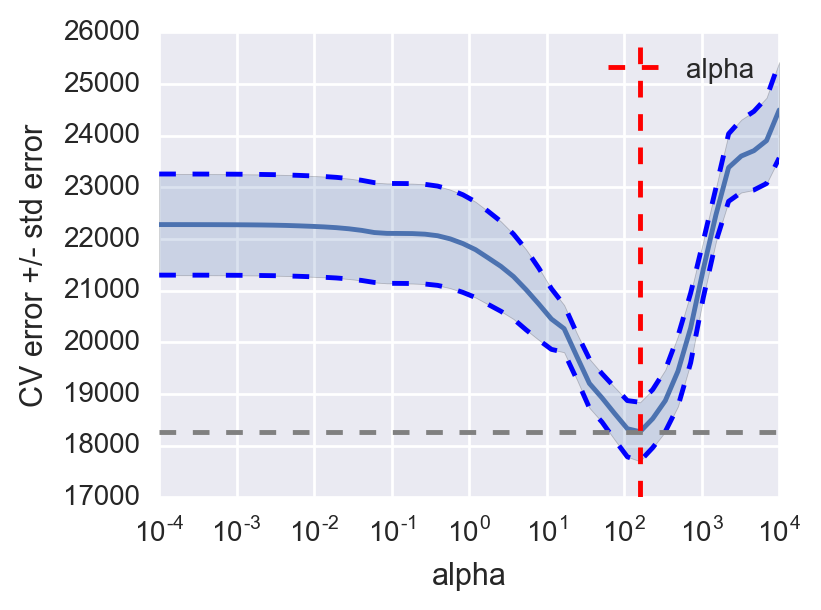

In [190]:
# function to estimate alpha using cross validation
from sklearn import metrics
import sklearn.linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut




def estimate_alpha(alpha_list, n_folds):
    scores = list()
    scores_std = list()
    min_score = 100000
    # run the the list of alphas
    for alpha in alpha_list:
        lassoModel = linear_model.Lasso(alpha=alpha)
        this_scores = -cross_val_score(lassoModel, trainX, trainY, scoring="neg_mean_absolute_error", cv=n_folds, n_jobs=1)
        scores.append(np.mean(this_scores))
        scores_std.append(np.std(this_scores)) 
        
    # find the minimum of the scores and the index
    
    optAlphaIdx = np.argmin(scores)
    optAlpha = alpha_list[optAlphaIdx]
    lowerBound = scores[optAlphaIdx] + (scores_std[optAlphaIdx]/np.sqrt(n_folds))
    # get the smallest alpha within +/- std error
    for i, alpha in enumerate(alpha_list):
        if scores[i] <= lowerBound and i>optAlphaIdx:
            oneStdAlpha = alpha
            
            break
    return scores, scores_std, optAlpha, oneStdAlpha

# function to plot the cross-validation error curve
def plot_cv_curve(alphas, scores, scores_std, optAlpha, n_folds):
    scores, scores_std = np.array(scores), np.array(scores_std)
    plt.figure().set_size_inches(4, 3)
    plt.semilogx(alphas, scores)

    # plot error lines showing +/- std. errors of the scores
    std_error = scores_std / np.sqrt(n_folds)

    plt.semilogx(alphas, scores + std_error, 'b--')
    plt.semilogx(alphas, scores - std_error, 'b--')

    # alpha=0.2 controls the translucency of the fill color
    plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)
    plt.ylabel('CV error +/- std error')
    plt.xlabel('alpha')
    plt.axhline(np.min(scores), linestyle='--', color='.5')
    plt.axvline(optAlpha, linestyle='--', color='r', label='alpha')
    plt.legend()
    plt.xlim([alphas[0], alphas[-1]])

    
alphas = np.logspace(-4, 4, 50)
scores, scores_std, k5optalpha, k5osralpha = estimate_alpha(alphas, 5)
print ("usual rule: alpha = %f \none stand error rule: alpha = %f"%(k5optalpha,k5osralpha))

plot_cv_curve(alphas, scores, scores_std, k5optalpha, 5)

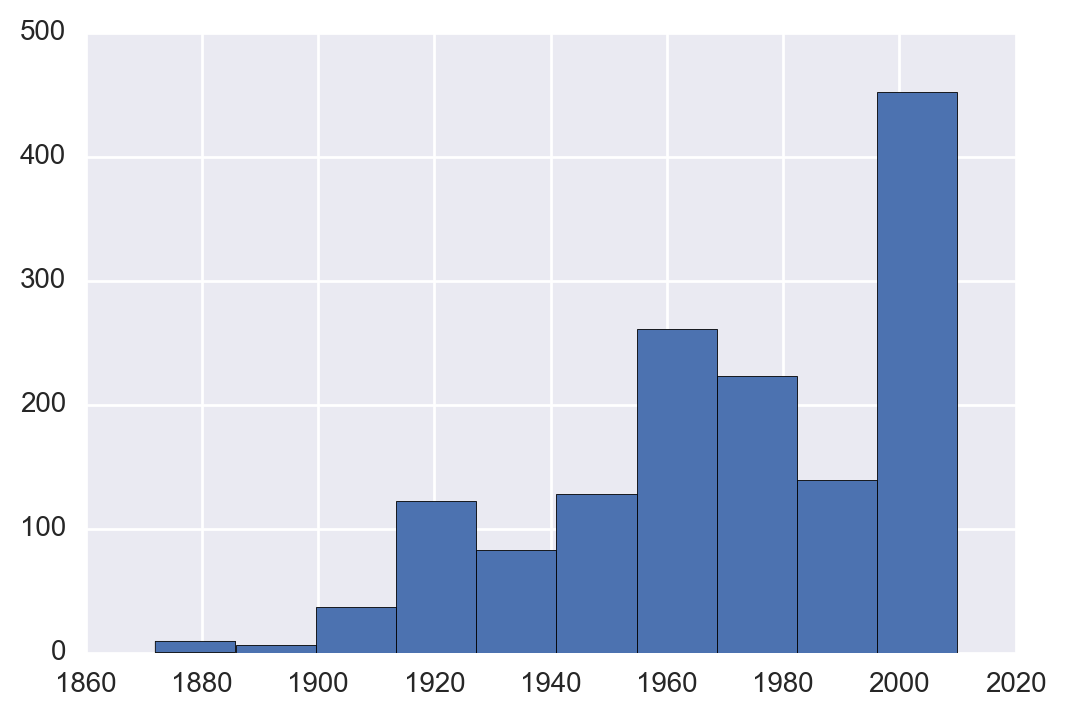

In [85]:
train_core = pd.get_dummies(train_core)
train_core = train_core.fillna(train_core.mean())
train_core['YearBuilt'].hist()

Pairwise Correlation


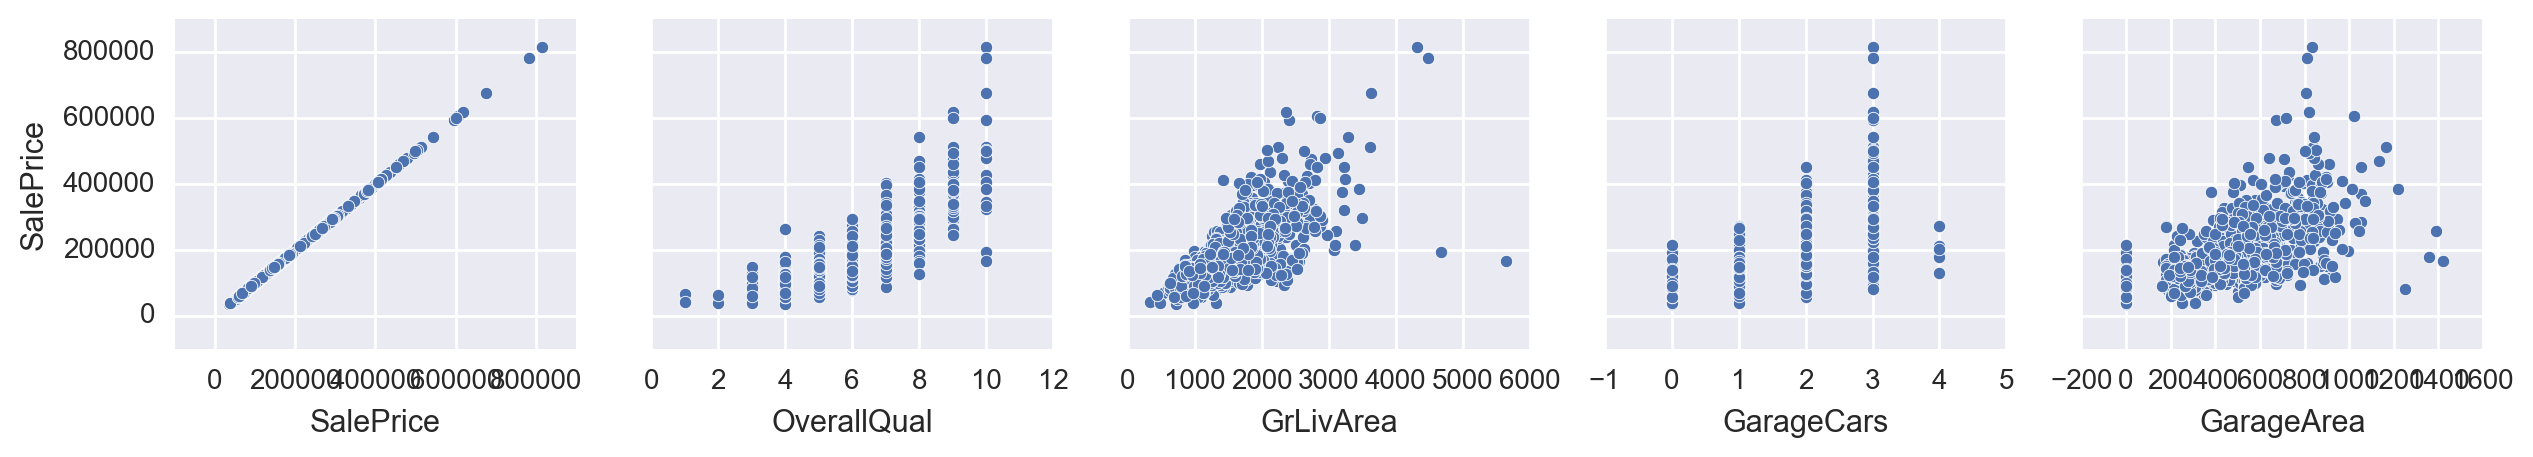

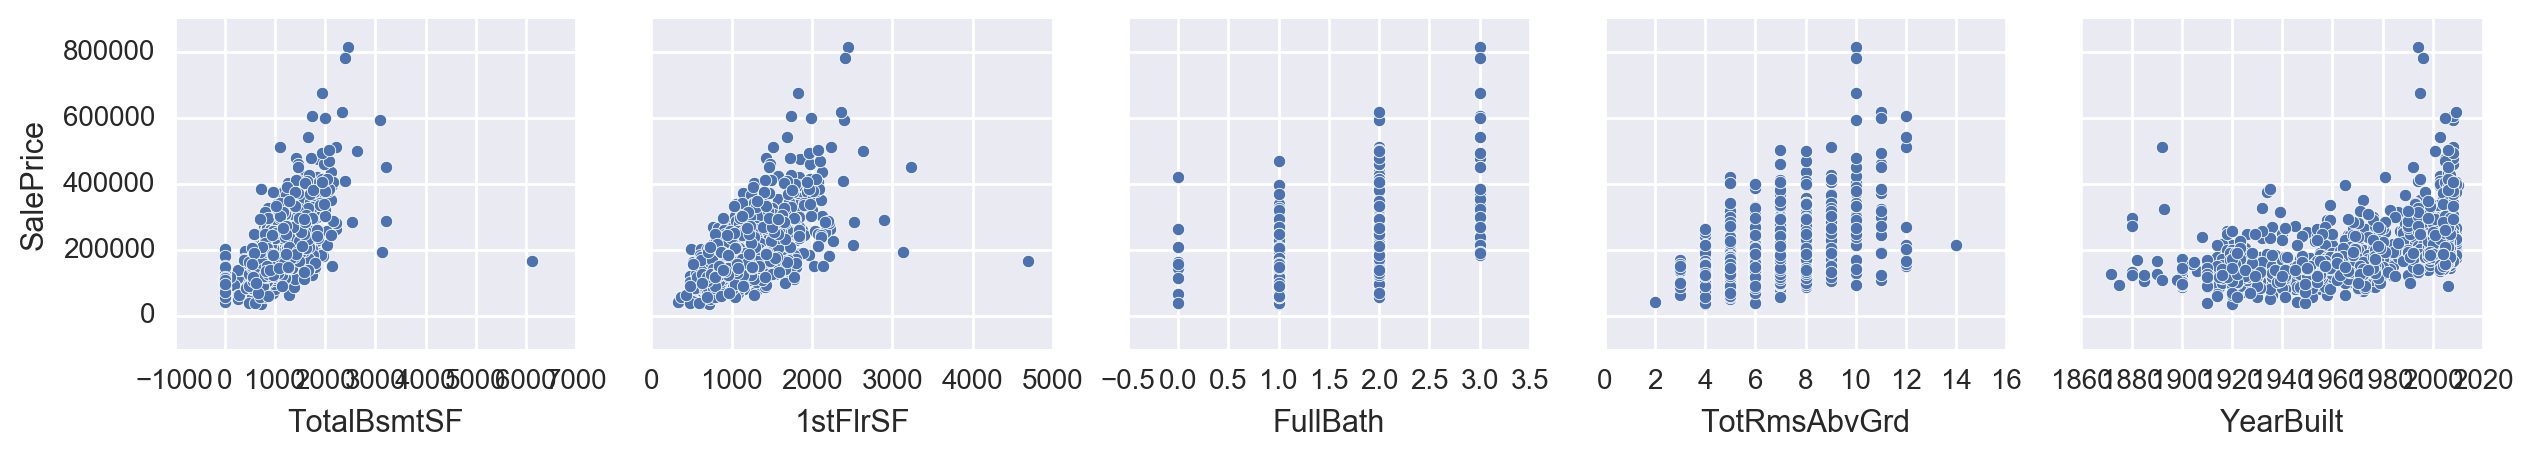

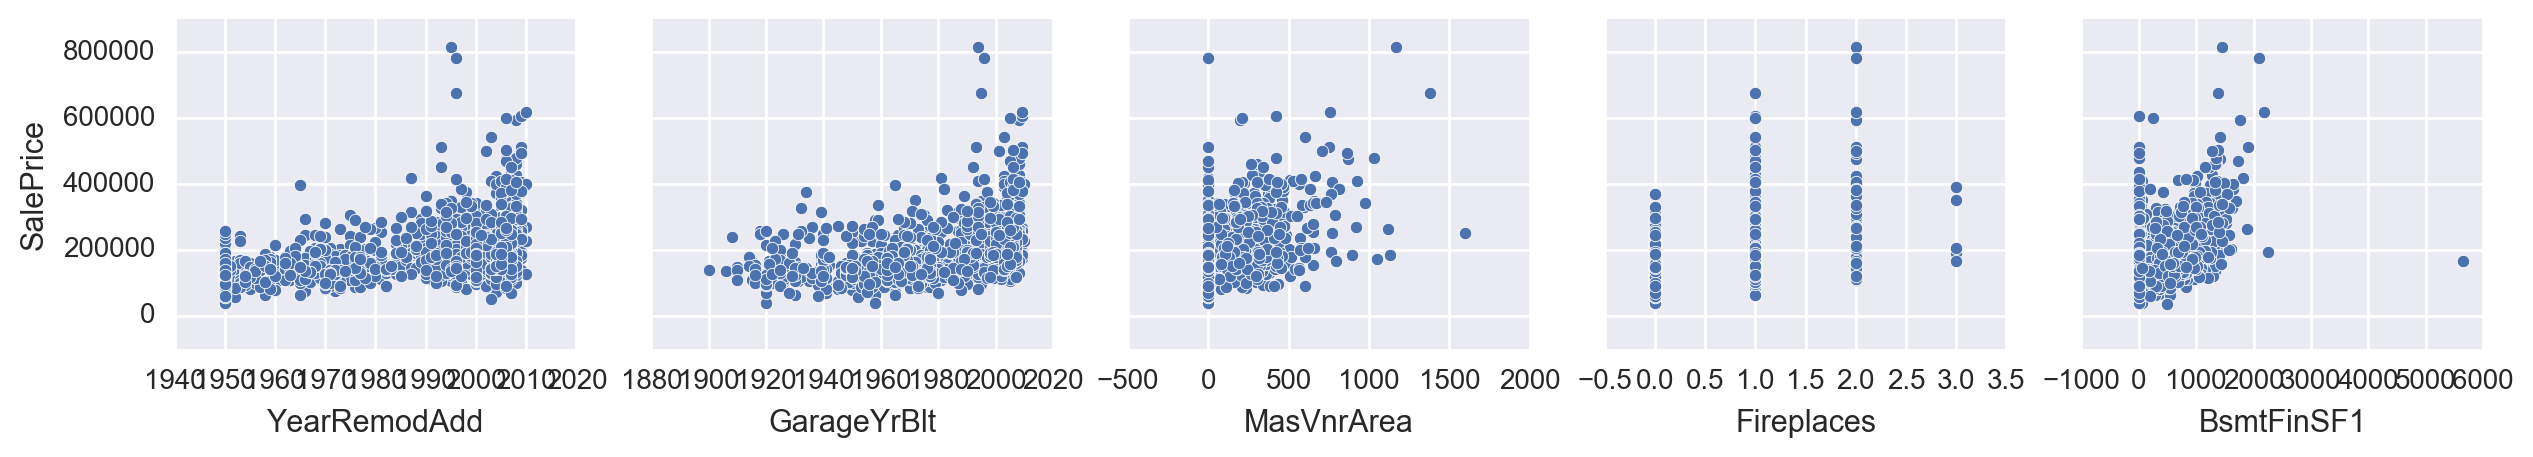

In [86]:
print 'Pairwise Correlation'
sns.set()
attributes = []
for i in xrange(5):
    attributes.append(core_attributes[i])
sns.pairplot(data=train,
                  x_vars=attributes,
                  y_vars=['SalePrice'])
plt.show()

sns.set()
attributes = []
for i in xrange(5,10):
    attributes.append(core_attributes[i])
sns.pairplot(data=train,
                  x_vars=attributes,
                  y_vars=['SalePrice'])
plt.show()

sns.set()
attributes = []
for i in xrange(10,15):
    attributes.append(core_attributes[i])
sns.pairplot(data=train,
                  x_vars=attributes,
                  y_vars=['SalePrice'])
plt.show()

In [140]:
X

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF
0,7,1710,2,548,856,856,2,8,2003,2003,196.0,0,706,65.000000,0
1,6,1262,2,460,1262,1262,2,6,1976,1976,0.0,1,978,80.000000,298
2,7,1786,2,608,920,920,2,6,2001,2002,162.0,1,486,68.000000,0
3,7,1717,3,642,756,961,1,7,1915,1970,0.0,1,216,60.000000,0
4,8,2198,3,836,1145,1145,2,9,2000,2000,350.0,1,655,84.000000,192
5,5,1362,2,480,796,796,1,5,1993,1995,0.0,0,732,85.000000,40
6,8,1694,2,636,1686,1694,2,7,2004,2005,186.0,1,1369,75.000000,255
7,7,2090,2,484,1107,1107,2,7,1973,1973,240.0,2,859,70.049958,235
8,7,1774,2,468,952,1022,2,8,1931,1950,0.0,2,0,51.000000,90
9,5,1077,1,205,991,1077,1,5,1939,1950,0.0,2,851,50.000000,0


Use the alpha from CV to do the regression for test set:

In [244]:
lassoModel = linear_model.Lasso(alpha=k5optalpha)
lassoModel.fit(trainX,trainY)
preds = lassoModel.predict(testX)

preds[preds<0] = 100000


# Convert back based on CPI (but we got worse score in Kaggle (0.15447), so maybe we should not convert it back(got 0.15087))
multi = np.repeat(1.0, len(testID))
for i,id in enumerate(testID):
    year = test.loc[i]['YrSold']
    mo = test.loc[i]['MoSold']
    
    if year == 2010 :
        if (mo == 7) or (mo ==6) or (mo<=4):
            multi[i] /=1.01  
    elif year == 2009:
        if (mo ==1) or (mo ==6) or(mo<=4):
            multi[i] /= 1.04
        elif (mo==2) or(mo==3) or (mo==4):
            multi[i] /= 1.03
        elif (mo==5)or(mo==6)or(mo==7)or(mo==8):
             multi[i] /=1.02
        elif mo >=9:
             multi[i] /= 1.01
    elif year ==2008:
        if (mo ==1) or (mo ==12):
            multi[i] /= 1.04
        elif (mo==3) or(mo==11):
            multi[i] /= 1.03
        elif (mo==5)or(mo==10):
             multi[i] /=1.01
    elif year ==2007:
        if (mo ==1) or (mo ==2):
            multi[i] /= 1.08
        elif (mo==3):
            multi[i] /= 1.07
        elif (mo==4):
             multi[i] /=1.06
        elif (mo>=5)and (mo<=10):
            multi[i] /= 1.05
        elif (mo>10):
             multi[i] /=1.04
    elif year ==2006:
        if (mo ==1):
            multi[i] /= 1.11
        elif (mo==2) or (mo==3):
            multi[i] /= 1.10
        elif (mo==4) or (mo>-10):
             multi[i] /=1.09
        elif ((mo>=5)and (mo<=7)) or (m0==9):
            multi[i] /= 1.08
        elif (mo==8):
             multi[i] /=1.07
        
preds = preds*multi 

In [245]:
solution = pd.DataFrame({"Id":testID, "SalePrice":preds})
solution.to_csv("lasso_sol.csv", columns=["Id","SalePrice"], index = False)

In [241]:
# from collections import Counter
# Counter(preds>0)